<a href="https://colab.research.google.com/github/adrienabbet/2025_ML_EES/blob/main/notebook_ml/S3_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

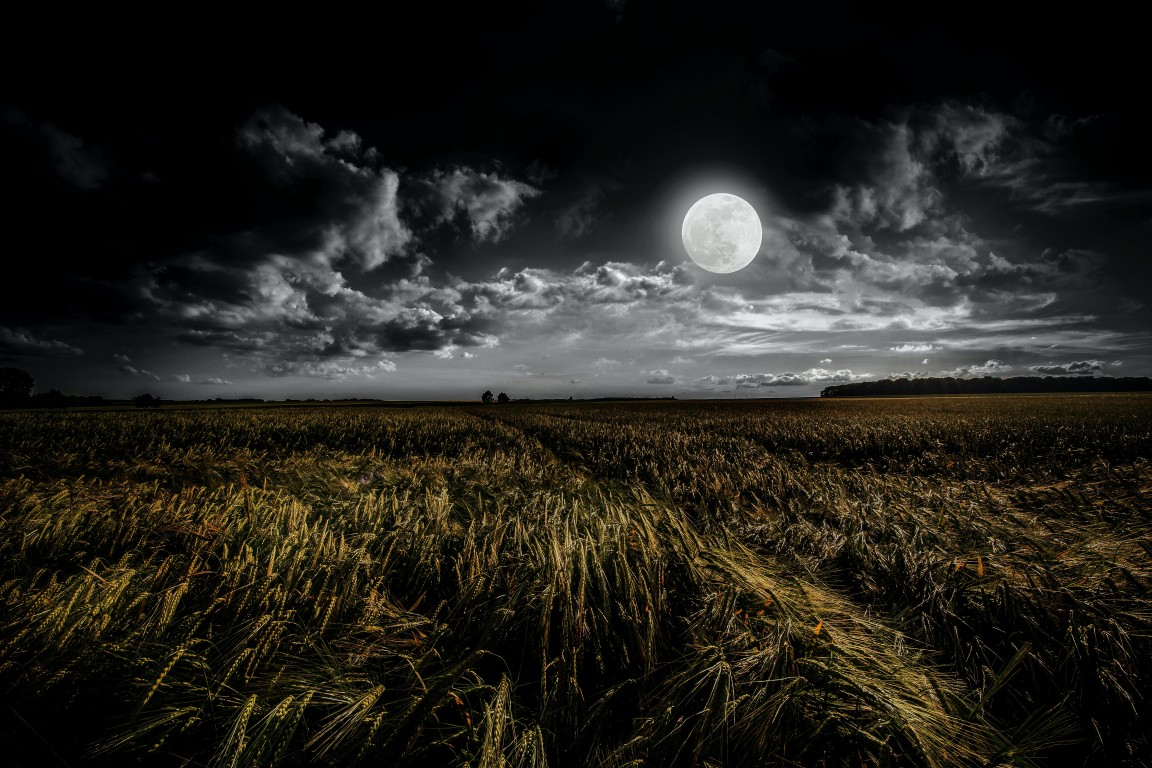

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [1]:
from sklearn.datasets import make_moons # Import function to make moons
import numpy as np

In [2]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)

print(X)
print(' ')
print(y)
print(' ')
print(np.size(X))
print(' ')
print(np.size(y))

[[ 0.22217171  0.74483851]
 [-0.55202977  0.79108664]
 [ 0.47999651  0.27584573]
 ...
 [-0.09526674 -0.574733  ]
 [-0.84083271 -0.05351891]
 [-0.18550777  0.80462144]]
 
[0 0 1 ... 1 0 0]
 
20000
 
10000


**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: Here we will keep 20% of the dataset for testing.

Hint 3: To ensure you get the same result every time you run the code, we will specify the `random_state` option in `train_test_split` function to be 42.

In [3]:
# Import the train_test_split function here.
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
# There will be four outputs in this function. 2 for X (train and test) and 2 for y (train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`. We adopt the latter visualization method in the code snippet. Do not hesitate to experiment with the first visualization method as long as the figure looks good.

<a name="Q2"></a>

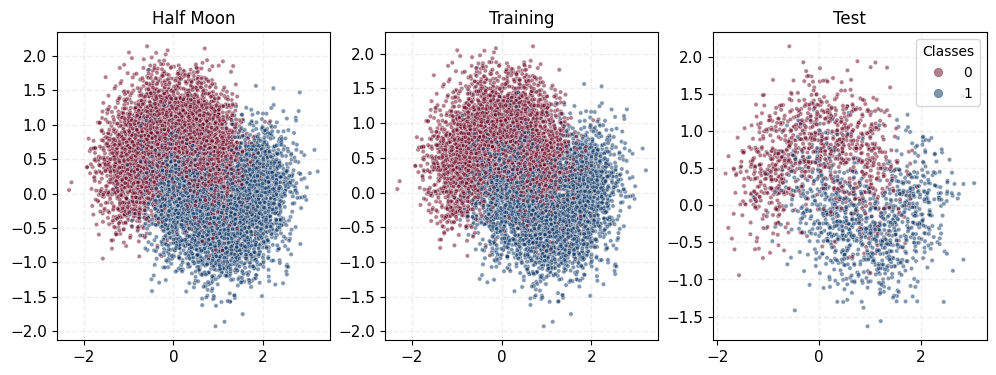

In [4]:
# Scatter the moon data and don't forget to add a legend to your figure
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, 3, figsize=(12, 4))
#########################################################################################################
# (1) Plot the whole dataset with plt.scatter
#########################################################################################################
# The X and y indices of each data point can be obtained like this: X[:,0], X[:,1]
# The scatter points should be coloured by y
scatter = ax[0].scatter(X[:,0], X[:,1], s=10, c=y, edgecolor='w', linewidths=0.5, alpha=0.5, cmap='RdBu')
# Add legend to the upper right corner of the figure
legend1 = plt.legend(*scatter.legend_elements(), loc='upper right', title="Classes")
ax[0].set_title('Half Moon')
ax[0].tick_params(axis='both', which='major', labelsize=11)
ax[0].grid(alpha=0.2, ls='--', lw=1)

#########################################################################################################
# (2) Plot the training dataset with plt.scatter
#########################################################################################################
scatter_train = ax[1].scatter(X_train[:,0], X_train[:,1], s=10, c=y_train, edgecolor='w', linewidths=0.5, alpha=0.5, cmap='RdBu')
ax[1].set_title('Training')
ax[1].tick_params(axis='both', which='major', labelsize=11)
ax[1].grid(alpha=0.2, ls='--', lw=1)

#########################################################################################################
# (2) Plot the test dataset with plt.scatter
#########################################################################################################
scatter_test = ax[2].scatter(X_test[:,0], X_test[:,1], s=10, c=y_test, edgecolor='w', linewidths=0.5, alpha=0.5, cmap='RdBu')
ax[2].set_title('Test')
ax[2].tick_params(axis='both', which='major', labelsize=11)
ax[2].grid(alpha=0.2, ls='--', lw=1)

plt.show()

Do your data & training/test splits look reasonable?

yes not bad in my humble opinion

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [5]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [6]:
#' Conduct the grid search to find good hyperparameter values
# for your decision tree
# For 'max_leaf_nodes', search between 2 and 120
# For 'min_samples_split', search between 2 and 10

##############################################################################################################################
# 1. Define hyperparameter search grid
##############################################################################################################################
# In param_grid, define the hyperparameters you would like to test, and the ranges the hyperparameters should be in
param_grid = {
   'max_leaf_nodes':list(range(2,121)),
    'min_samples_split':list(range(2,11))
    }

##############################################################################################################################
# 2. GridSearch
# #############################################################################################################################
# Perform GridSearch on your DecisionTree (random_state=42 to ensure same result
# every time) use cv=3, verbose=1 for GridSearchCV()
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, verbose=1)

##############################################################################################################################
# 3. Fit on training set
##############################################################################################################################
gsc_tree.fit(X_train, y_train)

Fitting 3 folds for each of 1071 candidates, totalling 3213 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [7]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
best_estim = gsc_tree.best_estimator_
print(best_estim)

DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)


**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [ ]:
# Make predictions on the training and test sets with your best model
y_pred_train = gsc_tree._________(_____)
y_pred_test = gsc_tree._________(_____)

In [ ]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
print(f'Accuracy over training set: {(accuracy_score(_________,____________)):.2%} \n'
f'Accuracy over test set: {(accuracy_score(_________,___________)):.2%}')

**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

In [ ]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
y_pred = gsc_tree.predict(______)
corr_X,wrong_X = [],[]
for indx,obj in enumerate(__________): # Pull out predictions on each data points one-by-one
  if ________________: # If the predictions is not equal to output truth (y_test)
    wrong_X.append(____________) # Model made an error
  else:
    corr_X.append(__________) # Model correct prediction

In [ ]:
# Recycle the visualization scripts earlier
fig,ax = plt.subplots(1,1,figsize=(5,4))
##############################################################################################################################
# 1. Plot correct prediction here
##############################################################################################################################
scatter_corr = ax.scatter(__________,_____________,s=10,color='k',edgecolor='w',linewidths=0.5,alpha=0.5)
##############################################################################################################################
# 2. Plot wrong prediction here
##############################################################################################################################
scatter_wrong = ax.scatter(__________,_____________,s=10,color='r',edgecolor='w',linewidths=0.5,alpha=0.5)
##############################################################################################################################
# 3. Title etc.
##############################################################################################################################
ax.set_title('Half Moon')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
plt.show()

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

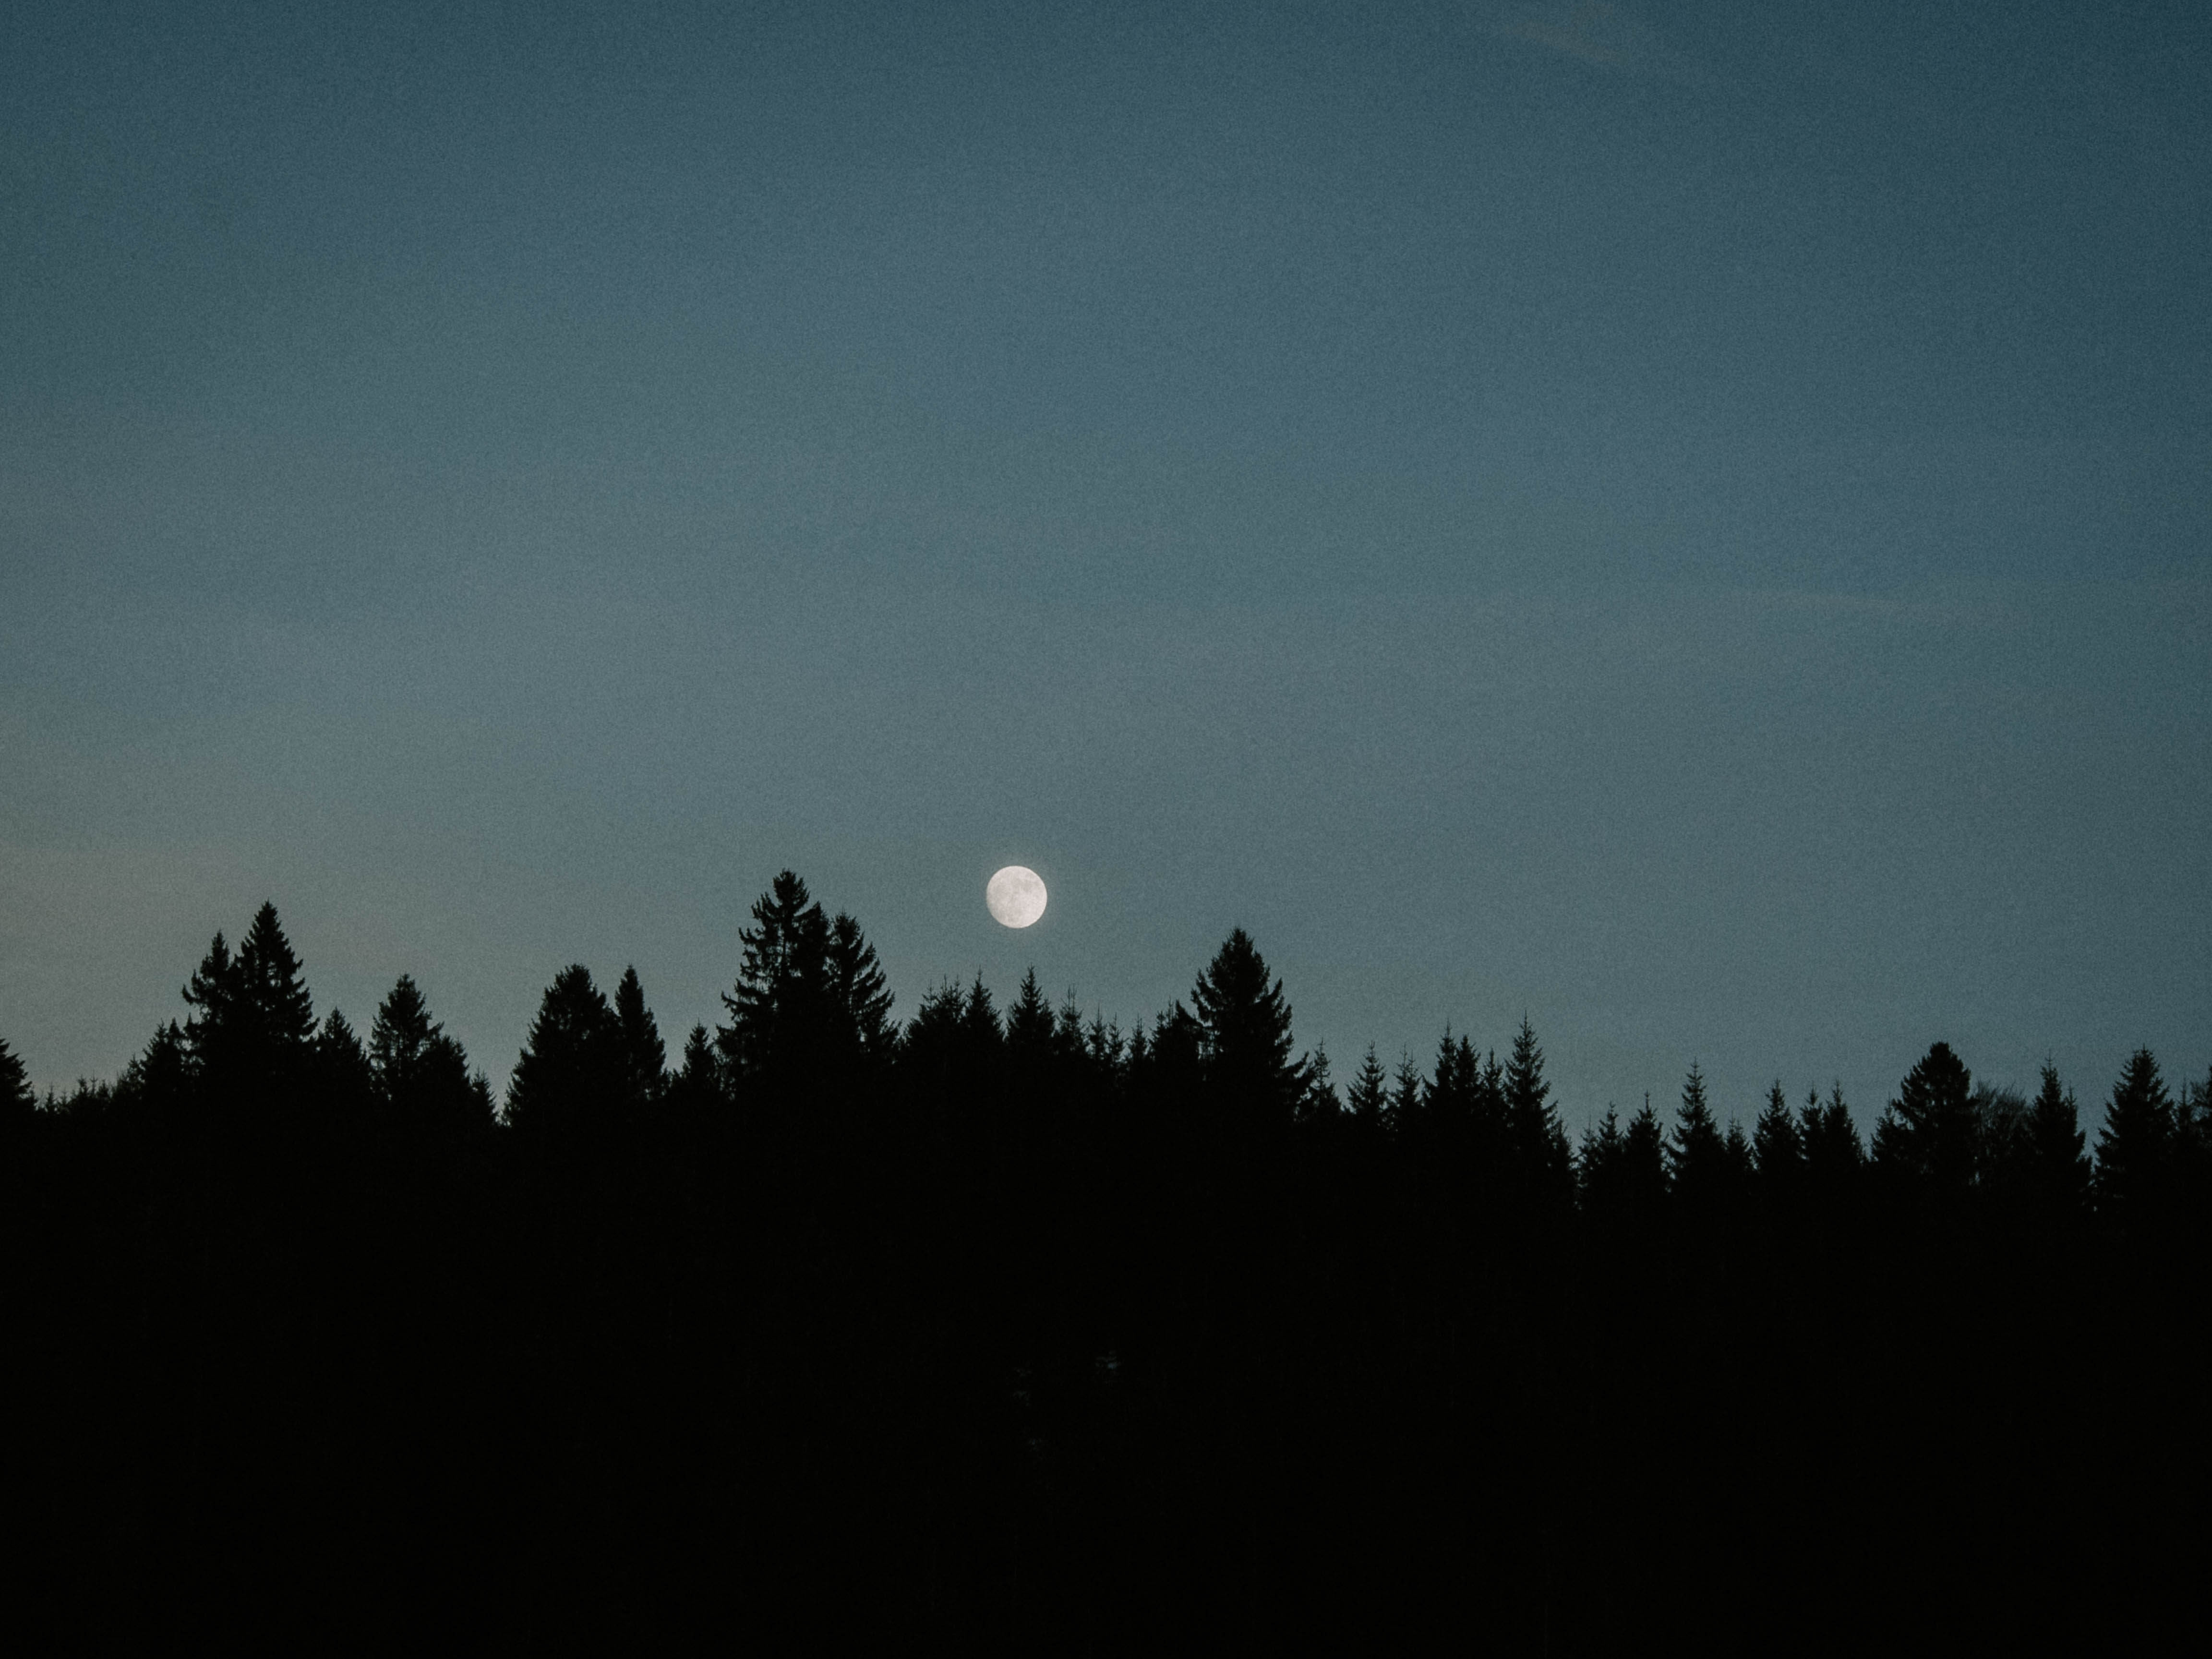

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator

In [ ]:
# Generate 1,000 subsets of the training sets with
# 100 randomly-selected instances

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset (clone also works! but here I'd like to do this the hard way =])

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets.

In [ ]:
# Calculate the mean accuracy

In [ ]:
# Visualize the distribution of accuracies

Now comes the magic ❇ 🌲 ❇

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set


In [ ]:
# For each instance of the test set, calculate the majority-vote prediction


Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree.

In [ ]:
# Calculate the accuracy of your random forest classifier

accuracy: 75.90%


In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly
# when the decision tree was making an error?